## Problem statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

## Predictions:
The aim is to build a predictive model and find out the sales of each product at a particular store.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
train["source"]="train"
test["source"]="test"
data=pd.concat([train,test],ignore_index=True)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


Read the dataset of train and test and combined together.

In [3]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Null value is present in columns Item_Weight, Outlet_Size and Item_Outlet_Sales.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

Displayed more informations of dataset.There are three datatype (float64=4, int64=1, object=8) is present in dataset.

In [5]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


All the variables have very less correlation between each other

Only exception is Item_MRP and Item_Outlet_Sales which shows significant correlation of 0.56

In [6]:
for column in data.columns:
  if data[column].dtype=='object':
    print("column name is: {} and number of distict values: {}".format(column,len(data[column].value_counts())))
    print()

column name is: Item_Identifier and number of distict values: 1559

column name is: Item_Fat_Content and number of distict values: 5

column name is: Item_Type and number of distict values: 16

column name is: Outlet_Identifier and number of distict values: 10

column name is: Outlet_Size and number of distict values: 3

column name is: Outlet_Location_Type and number of distict values: 3

column name is: Outlet_Type and number of distict values: 4

column name is: source and number of distict values: 2



Based on below output we see there are 1559 values in item_identifier,we can drop as it is not so important variable

Also if we keep it will increase the columns by 1559 when we will use one hot encoding

Similary outlet identifier also can be removed from the dataset

In [7]:
for column in data.columns:
    if data[column].dtype=="object":
        print(data[column].value_counts())
        print()

FDL12    10
FDU26    10
DRG48    10
NCD43    10
FDP09    10
         ..
FDM10     7
FDM50     7
DRN11     7
FDM52     7
FDL50     7
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


In [8]:
data["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
data["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
data["Item_Fat_Content"].replace("reg","Regular",inplace=True)

Replacing low fat and LF with Low Fat/replacing reg with Regular

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

As per aboveb result null values are present in Item_Weight and Outlet_Size are numerical value which one can replace by mean and mode according to distrubutions of data.

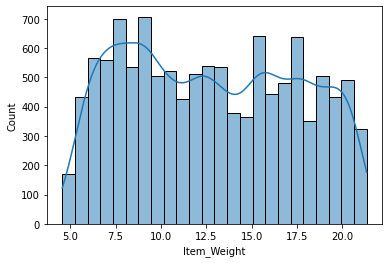

In [10]:
import seaborn as sns
sns.histplot(data['Item_Weight'],kde=True)

Item_weight is not normally distrubuted hence it will be replace by Median.

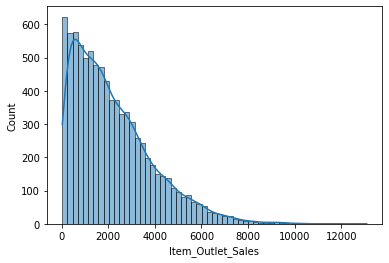

In [11]:
sns.histplot(data['Item_Outlet_Sales'],kde=True)

Item_Outlet_Sales is not normally distrubuted hence it will be replace by Median.

In [12]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].median())
data['Item_Outlet_Sales']=data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].median())

As aboveb fill Null value of numberical by median and categorical values by Mode.

In [13]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

Now there are no any Null vales are present in dataset.

In [14]:
df_bigmart=pd.get_dummies(data,columns=["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Size","Outlet_Type"])
df_bigmart

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,train,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,train,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,train,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,train,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,train,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,141.3154,OUT046,1997,1794.3310,test,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
14200,FDD47,7.60,0.142991,169.1448,OUT018,2009,1794.3310,test,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
14201,NCO17,10.00,0.073529,118.7440,OUT045,2002,1794.3310,test,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
14202,FDJ26,15.30,0.000000,214.6218,OUT017,2007,1794.3310,test,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


we have dataset which have non numeric columns and it needs to be converted to numeric
These three categorical colums has been converted in to one hot encoding.This is done so that ML model is able to process it

In [15]:
df_item_outlet=df_bigmart[["Item_Identifier","Outlet_Identifier","source"]]
df_item_outlet

,Item_Identifier,Outlet_Identifier,source
0,FDA15,OUT049,train
1,DRC01,OUT018,train
2,FDN15,OUT049,train
3,FDX07,OUT010,train
4,NCD19,OUT013,train
...,...,...,...
14199,FDB58,OUT046,test
14200,FDD47,OUT018,test
14201,NCO17,OUT045,test
14202,FDJ26,OUT017,test


store item identifier ,outlet identifier and source in variable df_item_outlet

In [16]:
df_bigmart["Outlet_Establishment_Year"]=2013-df_bigmart["Outlet_Establishment_Year"]

we can covert outlet establishment year to howold is outlet

In [17]:
df_bigmart["Outlet__Years_of_operation"]=df_bigmart["Outlet_Establishment_Year"]
df_bigmart.drop(columns=["Outlet_Establishment_Year"],inplace=True)

Made a column "Outlet__Years_of_operation" and drop "Outlet_Establishment_Year"

In [18]:
cols_to_be_checked=["Item_MRP","Item_Visibility","Item_Weight","Outlet__Years_of_operation"]
for col in df_bigmart.skew().index:
    if col in cols_to_be_checked:
        print("Skewness of column {} is: {}".format(col,df_bigmart.skew().loc[col]))

Skewness of column Item_Weight is: 0.13471142395276792
Skewness of column Item_Visibility is: 1.1951751774587889
Skewness of column Item_MRP is: 0.13072836040225863
Skewness of column Outlet__Years_of_operation is: 0.3964651900863859


As per aboveb result found skewnes in data set

In [19]:
import numpy as np
df_bigmart.skew()
for col in df_bigmart.skew().index:
    if col in cols_to_be_checked:
        if df_bigmart.skew().loc[col]>0.5:
            df_bigmart[col]=np.sqrt(df_bigmart[col])
        if df_bigmart.skew().loc[col]<-0.5:
            df_bigmart[col]=np.cbrt(df_bigmart[col])

Removed skewness of data set

In [20]:
for col in df_bigmart.skew().index:
    if col in cols_to_be_checked:
        print("Skewness of column {} is: {}".format(col,df_bigmart.skew().loc[col]))

Skewness of column Item_Weight is: 0.13471142395276792
Skewness of column Item_Visibility is: -0.0967582787285686
Skewness of column Item_MRP is: 0.13072836040225863
Skewness of column Outlet__Years_of_operation is: 0.3964651900863859


Aboveb columns skewness has been also removed.

In [21]:
df_bigmart.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace=True)

droped ("Item_Identifier","Outlet_Identifier","source") from dataset

In [22]:
df_train=df_bigmart.loc[df_bigmart["source"]=="train"]
df_test=df_bigmart.loc[df_bigmart["source"]=="test"]
df_test.reset_index(drop=True,inplace=True)
print(df_train.columns)
print(df_test.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'source', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet__Years_of_operation'],
      dtype='object')
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', '

Seprated the train and test

In [23]:
df_test.drop(columns=["Item_Outlet_Sales"],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,



Droped the Item_Outlet_Sales from test dataset as that is the o/p variable that needs to be predicted

In [24]:
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Droped source column from df_train and df_test

In [25]:
df_x=df_train.drop(columns=["Item_Outlet_Sales"])
y=df_train[["Item_Outlet_Sales"]]

seprated input and output from df_train

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

Made every column to common scale

### function of  random stat which gives maximum r2_score

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,90):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

### Function which evaluates the model using cross_val_score

In [28]:
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

### Lets use pca to reduce the dimensionality

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=23)
x_pca=pca.fit_transform(x)
print("vraiance :{}".format(np.sum(pca.explained_variance_ratio_)))

vraiance :0.9480292259026457


### Lets use decision tree

In [30]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x_pca,y)

r2 score corresponding to  42  is  0.16326960861683026
r2 score corresponding to  43  is  0.16693781950727926
r2 score corresponding to  44  is  0.07169257436762877
r2 score corresponding to  45  is  0.11816677296883371
r2 score corresponding to  46  is  0.051337471256287515
r2 score corresponding to  47  is  0.12515240985416187
r2 score corresponding to  48  is  0.19265065733641507
r2 score corresponding to  49  is  0.13277228093289284
r2 score corresponding to  50  is  0.1179057425110952
r2 score corresponding to  51  is  0.13442711940060992
r2 score corresponding to  52  is  0.09654467787820742
r2 score corresponding to  53  is  0.05456636172392104
r2 score corresponding to  54  is  0.17941737551235537
r2 score corresponding to  55  is  0.16525108197311278
r2 score corresponding to  56  is  0.11634066837086199
r2 score corresponding to  57  is  0.1598937616686369
r2 score corresponding to  58  is  0.10630862066496605
r2 score corresponding to  59  is  0.08163862595761473
r2 score co

### lets use random forest regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'n_estimators': 500}

In [32]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,x_pca,y)

r2 score corresponding to  42  is  0.5493418501793685
r2 score corresponding to  43  is  0.5782361348865779
r2 score corresponding to  44  is  0.5531668829958245
r2 score corresponding to  45  is  0.5362890000962469
r2 score corresponding to  46  is  0.5011659756804686
r2 score corresponding to  47  is  0.5452199293215931
r2 score corresponding to  48  is  0.5557479231220936
r2 score corresponding to  49  is  0.5531064664898592
r2 score corresponding to  50  is  0.5392148255701468
r2 score corresponding to  51  is  0.525511158520426
r2 score corresponding to  52  is  0.5242047733169495
r2 score corresponding to  53  is  0.5241746490074691
r2 score corresponding to  54  is  0.5642548378524173
r2 score corresponding to  55  is  0.5606708850438221
r2 score corresponding to  56  is  0.5355775940072669
r2 score corresponding to  57  is  0.5472962363153626
r2 score corresponding to  58  is  0.5416449676806874
r2 score corresponding to  59  is  0.5409454578174431
r2 score corresponding to  60

### lets check KNN 

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x_pca, y)
clf.best_params_

{'n_neighbors': 8}

In [34]:
knr=KNeighborsRegressor(n_neighbors=8)
r_state=maxr2_score(knr,x_pca,y)

r2 score corresponding to  42  is  0.5024503497893338
r2 score corresponding to  43  is  0.5000794185225176
r2 score corresponding to  44  is  0.49877293838417036
r2 score corresponding to  45  is  0.483163329716524
r2 score corresponding to  46  is  0.4528665820231246
r2 score corresponding to  47  is  0.46163872649734694
r2 score corresponding to  48  is  0.4942474356641995
r2 score corresponding to  49  is  0.5118540089429913
r2 score corresponding to  50  is  0.48684002342009514
r2 score corresponding to  51  is  0.48189287390752356
r2 score corresponding to  52  is  0.4932885082478994
r2 score corresponding to  53  is  0.4610777468483389
r2 score corresponding to  54  is  0.5023740540230146
r2 score corresponding to  55  is  0.5019781659399363
r2 score corresponding to  56  is  0.48234027774768196
r2 score corresponding to  57  is  0.46217565955746365
r2 score corresponding to  58  is  0.48488933906153286
r2 score corresponding to  59  is  0.4914636335431105
r2 score corresponding

### Lets use SVM regressor

In [35]:
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [36]:
svr=SVR(kernel="linear",C=10)
r_state=maxr2_score(svr,x_pca,y)

r2 score corresponding to  42  is  0.4924008957922199
r2 score corresponding to  43  is  0.48627350046814743
r2 score corresponding to  44  is  0.49880016238204283
r2 score corresponding to  45  is  0.4908755723351079
r2 score corresponding to  46  is  0.47832681548093336
r2 score corresponding to  47  is  0.48185299218623356
r2 score corresponding to  48  is  0.48174439053978246
r2 score corresponding to  49  is  0.4815905524451658
r2 score corresponding to  50  is  0.4811980821090379
r2 score corresponding to  51  is  0.4790552186787512
r2 score corresponding to  52  is  0.49650121217904364
r2 score corresponding to  53  is  0.47758238590439606
r2 score corresponding to  54  is  0.49023748409038537
r2 score corresponding to  55  is  0.47638658500787545
r2 score corresponding to  56  is  0.45551400477408
r2 score corresponding to  57  is  0.4667324025857478
r2 score corresponding to  58  is  0.49294009332908895
r2 score corresponding to  59  is  0.4738113903340192
r2 score correspondi

### Now lets do cross_validation of various models

In [37]:
print("DECISION TREE REGRESSOR\n\n")
model_evaluation(dtr,x_pca,y)

DECISION TREE REGRESSOR


Mean r2 score for regressor:  0.12616363516247037
standard deviation in r2 score for regressor:  0.02877761688659727
[0.13865584 0.0850466  0.09935918 0.15831727 0.14943928]


In [38]:
print("RANDOM FOREST REGRESSOR\n\n")
model_evaluation(rfr,x_pca,y)

RANDOM FOREST REGRESSOR


Mean r2 score for regressor:  0.541817934878112
standard deviation in r2 score for regressor:  0.016297979471873114
[0.55397138 0.52383684 0.52052012 0.55116152 0.55959981]


In [39]:
print("SVM REGRESSOR\n\n")
model_evaluation(svr,x_pca,y)

SVM REGRESSOR


Mean r2 score for regressor:  0.4851613210158575
standard deviation in r2 score for regressor:  0.004671737280230764
[0.49091579 0.48710041 0.48558217 0.4766796  0.48552864]


### Based on above r2 scores arandom forest and SVM are performing better than other two
### lets make model using SVM

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 76,test_size=0.20)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

### Lets find the rmse and r2_score using sklearn.metrics for SVM model

In [41]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1178.6312209671353
r2_score is:  0.514183325931777


In [42]:
import pickle
import joblib
joblib.dump(svr,'big_mart_svr.obj')
pickle.dump(svr,open('big_mart_svr.pkl','wb'))

Save model with both library.